<a href="https://colab.research.google.com/github/YuchanJeon1107/ICT-Innovation-Square/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tensorflow

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
x_data = np.arange(1, 6).reshape(-1, 1)

In [ ]:
x_data

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
# y_data = [3, 5, 7, 9, 11]
y_data = (2*x_data) + 1

In [ ]:
y_data

array([[ 3],
       [ 5],
       [ 7],
       [ 9],
       [11]])

In [ ]:
x_data.shape, y_data.shape

((5, 1), (5, 1))

(0.0, 15.0)

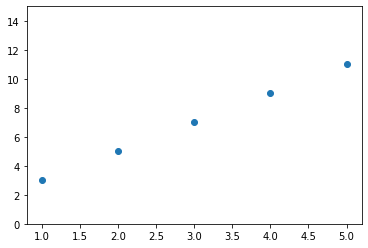

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 15)

In [ ]:
# 신경망 모델 정의
# tensorflow에서 한번 값을 초기화하고, 그 이후에도 값을 계속 업데이트할 수 있는 데이터 타입
W = tf.Variable(6.0)
b = tf.Variable(-0.5)

model = W*x_data + b

In [ ]:
print(W.numpy(), b.numpy())

6.0 -0.5


In [ ]:
# 학습이 이루어지지 않은 현재, W=6.0, b=-0.5인 현재 x:1-5까지 입력으로 들어갈 때 나오는 값
model.numpy()

array([[ 5.5],
       [11.5],
       [17.5],
       [23.5],
       [29.5]], dtype=float32)

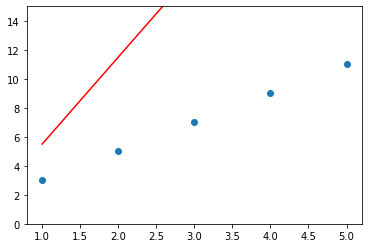

In [ ]:
plt.plot(x_data, model.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 15)
plt.show()

In [ ]:
cost = tf.reduce_mean(tf.square(model - y_data))

In [ ]:
with tf.GradientTape() as tape:
  model = W * x_data + b
  cost = tf.reduce_mean(tf.square(model - y_data))

W_grad, b_grad = tape.gradient(cost, [W, b])
W_grad.numpy(), b_grad.numpy()

(79.0, 21.0)

In [ ]:
# 파라메터 업데이트
learning_rate = 0.01
# loss 함수를 W에 대해 편미분하고 W에 대한 기울기가 최소가 되게 이동
W.assign_sub(learning_rate * W_grad)
# loss 함수를 b에 대해 편미분하고 b에 대한 기울기가 최소가 되게 이동
W.assign_sub(learning_rate * b_grad)

W.numpy(), b.numpy()

(1.0, -0.5)

    0|    5.2100|   -0.7100|142.250000
   10|    2.8172|   -1.2862|  1.635579
   20|    2.6363|   -1.2527|  0.935422
   30|    2.6048|   -1.1805|  0.871482
   40|    2.5840|   -1.1081|  0.814396
   50|    2.5645|   -1.0379|  0.761061
   60|    2.5457|   -0.9700|  0.711218
   70|    2.5275|   -0.9044|  0.664640
   80|    2.5099|   -0.8410|  0.621112
   90|    2.4930|   -0.7797|  0.580435
  100|    2.4765|   -0.7204|  0.542422
  110|    2.4607|   -0.6632|  0.506898
  120|    2.4453|   -0.6078|  0.473701
  130|    2.4305|   -0.5542|  0.442678
  140|    2.4162|   -0.5025|  0.413686
  150|    2.4023|   -0.4524|  0.386594
  160|    2.3889|   -0.4041|  0.361276
  170|    2.3760|   -0.3573|  0.337615
  180|    2.3634|   -0.3121|  0.315505
  190|    2.3513|   -0.2684|  0.294842
  200|    2.3396|   -0.2262|  0.275532
  210|    2.3283|   -0.1854|  0.257488
  220|    2.3174|   -0.1459|  0.240625
  230|    2.3068|   -0.1077|  0.224866
  240|    2.2966|   -0.0708|  0.210139
  250|    2.2867|   -0.03

(0.0, 8.0)

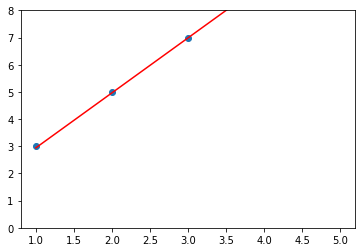

In [ ]:
W = tf.Variable(6.0)
b = tf.Variable(-0.5)

for i in range(1000):
    # with 구문에서 신경망에 정방향으로 데이터를 입력해서 예측값(model)
    # 정답값과 예측값을 빼서 cost값을 구하고
    with tf.GradientTape() as tape:
        model = W * x_data + b
        cost = tf.reduce_mean(tf.square(model - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, model.numpy(), 'r-')
plt.ylim(0, 8)

## Keras

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(1, input_shape=(1, )))
    return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
learning_rate = 0.001
batch_size = 2
epochs = 1000

model.compile(optimizer=keras.optimizers.SGD(learning_rate),
              loss='MSE',
              metrics=['MSE'])

In [ ]:
model.fit(x_data, y_data, batch_size, epochs)

Epoch 1/1000
3/3 [==============================] - 1s 4ms/step - loss: 165.0702 - MSE: 165.0702
Epoch 2/1000
3/3 [==============================] - 0s 4ms/step - loss: 145.9447 - MSE: 145.9447
Epoch 3/1000
3/3 [==============================] - 0s 6ms/step - loss: 128.3259 - MSE: 128.3259
Epoch 4/1000
3/3 [==============================] - 0s 5ms/step - loss: 107.7691 - MSE: 107.7691
Epoch 5/1000
3/3 [==============================] - 0s 6ms/step - loss: 94.7932 - MSE: 94.7932
Epoch 6/1000
3/3 [==============================] - 0s 3ms/step - loss: 82.6609 - MSE: 82.6609
Epoch 7/1000
3/3 [==============================] - 0s 4ms/step - loss: 69.6084 - MSE: 69.6084
Epoch 8/1000
3/3 [==============================] - 0s 4ms/step - loss: 59.5947 - MSE: 59.5947
Epoch 9/1000
3/3 [==============================] - 0s 4ms/step - loss: 51.9141 - MSE: 51.9141
Epoch 10/1000
3/3 [==============================] - 0s 4ms/step - loss: 43.4852 - MSE: 43.4852
Epoch 11/1000
3/3 [======================

In [ ]:
pred = model.predict([12.0])
pred

array([[25.000494]], dtype=float32)